In [469]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy


# Random numbers

Numpy let you generate random numbers. Using the random number generators given as examples, implement the functions below.

In [470]:
np.random.normal()

1.2835042249623803

In [471]:
mu = 10
variance = 2
np.random.normal(mu, variance, size=(3, ))

array([ 9.44393766, 10.25236245,  8.72039707])

In [472]:
p = 0.8
n = 10
np.random.binomial(n, p), np.random.binomial(1, p) # Binomial(n,p), Bernoulli(p)

(6, 1)

In [473]:
np.random.binomial(1, p, size=(5, ))

array([0, 1, 1, 1, 0])

In [474]:
from scipy import linalg

def generate_wishart_square_root(n, covariance, k=1):
    """
    Return k Wishart matrices with degrees of freedom n
    and given covariance.
    
    Parameters
    ----------
    n: int
        degrees of freedom
    covariance: np array of shape (p, p)
        covariance matrix
    k: int or None (optional)
        number of wishart matrices to return
    
    Return
    ------
    W: np array of shape (k, p, p)
        k Wishart matrices
    """
    p = covariance.shape[0]
    X = np.random.multivariate_normal(np.zeros(p), covariance, size=(n, ))
    W = X.T.dot(X)
    assert W.shape == covariance.shape
    return W
    
generate_wishart_using_multivariate_normal(5, np.eye(3))

array([[11.81261366,  1.31871926, -4.38122924],
       [ 1.31871926,  1.48988342,  1.33587753],
       [-4.38122924,  1.33587753,  6.86877301]])

In [475]:
np.random.choice(6) + 1 # roll a die

4

In [476]:
1 + np.random.choice(6, p =[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=(10, ))  # roll a die 10 times

array([3, 3, 5, 5, 3, 3, 5, 6, 1, 4])

In [477]:
# roll a biased die 10 times
1 + np.random.choice(6, p =[1/10, 1/10, 1/10, 1/10, 1/10, 1/2], size=(10, )) 

array([3, 6, 4, 6, 1, 6, 6, 3, 6, 6])

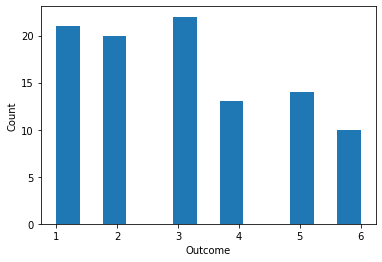

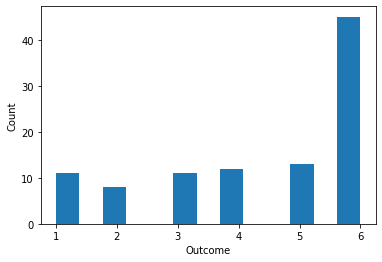

In [478]:
def biased_die_histogram(p, k):
    """
    Draw a biased die with probabilities p, k times, and plot the resulting histograms.
    There should be six bars.
    
    Parameters
    ----------
    p : np array of shape (6,)
        The probabilities associated with each outcome of the dice.
    k: int
        Number of rolls
    """
    dice = 1 + np.random.choice(6, p=p, size=(k, )) 
    plt.figure()
    plt.hist(dice, bins=13)
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.show()

biased_die_histogram([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 100)
biased_die_histogram([1/10, 1/10, 1/10, 1/10, 1/10, 1/2], 100)

# SVD, Pseudo-Inverse in numpy

Generate a random matrix A of size (3, 6) with iid N(0,1) entries, and verify that the singular values squared are the eigenvalues of the matrix $A^TA$.

Verify that the pseudo-inverse computed by ``np.linalg.pinv`` is the same as the pseudo-inverse computed from its definition using the SVD.

In [479]:
def test_singular_values_eigenvalues():
    """Test that the square of the singular values of X gives the eigenvalue of X^T.dot(X)
    """
    A = np.random.normal(size=(3, 6))
    U, singular_values, VT = np.linalg.svd(A)
    eigenvalues, V = np.linalg.eigh(A @ A.T)
    singular_values = np.sort(singular_values)
    np.testing.assert_allclose(singular_values**2, eigenvalues)

test_singular_values_eigenvalues()

def test_pinv():
    """Test that computing the pseudo inverse with pinv or via svd gives the same result
    """
    A = np.random.normal(size=(3, 6))
    U, singular_values, VT = np.linalg.svd(A, full_matrices=False)
    A_inv = VT.T.dot(np.diag(1 / singular_values)).dot(U.T)
    np.testing.assert_allclose(A_inv, np.linalg.pinv(A))

test_pinv()

# Boxplots

Using matplotlib, for each $\theta = 1,2,...20$, generate 100 independent copies of a random variable with $N(\theta, \theta^{-1})$ distribution. Plot the generated random variables with boxplots, one boxplot for each value of $\theta$ and the x-axis representing $\theta$.

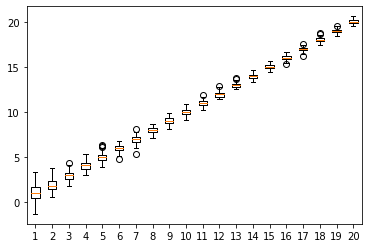

In [480]:
def plot_boxplot_normal_increasing_mean_and_variance():
    """Using matplotlib, for each theta = 1,2,...,20, 
    generate 100 independent copies of a random variable 
    with N(theta, theta^{-1}) distribution. 
    Plot the generated random variables with boxplots, 
    one boxplot for each value of theta and 
    the x-axis representing theta.
    """
    thetas = np.arange(1, 21)
    random_variables = []
    for theta in thetas:
        rvs = []
        for _ in range(100):
            rvs.append(theta +  np.random.randn()/ np.sqrt(theta))
        random_variables.append(rvs)
    random_variables = np.array(random_variables)
    plt.figure()
    plt.boxplot(random_variables.T)
    plt.show()

plot_boxplot_normal_increasing_mean_and_variance()

# Quantile quantile plots

In order to check visually that a collection of random variables follow a certain distribution, quantile quantile plots are convenient.

In [481]:
n = 10
X = np.random.randint(1000, size=n) # generate n numbers
X_sort = np.sort(X) # sort them
scores  = np.arange(1, n + 1) / (n+1) # their corresponding scores (many other methods are possible)

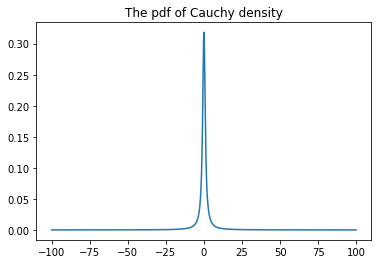

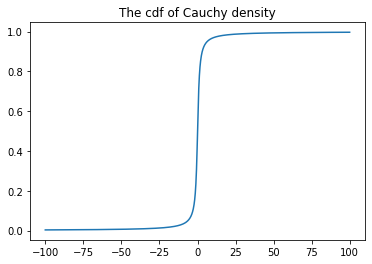

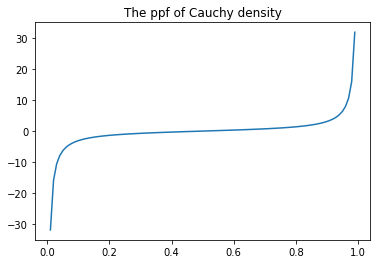

20%, 50% and 60% quantiles: [-1.37638192  0.          0.3249197 ]


In [482]:
# Getting theoretical quantities on distributions
cauchy = scipy.stats.cauchy # many others are available
# the probability density function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The pdf of Cauchy density")
plt.plot(X, cauchy.pdf(X))
plt.show()
# the cumulative distribution function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The cdf of Cauchy density")
plt.plot(X, cauchy.cdf(X))
plt.show()
# the percent point function (inverse of cdf)
X = np.arange(0, 1, 0.01)
plt.figure()
plt.title("The ppf of Cauchy density")
plt.plot(X, cauchy.ppf(X))
plt.show()
# Theoretical 20%, 50% and 60% quantiles of cauchy distribution
quantiles = cauchy.ppf((0.2, 0.5, 0.6))
print("20%, 50% and 60% quantiles:", quantiles)

Generate 100 independent copies of N(1,3) random variables and plot the QQ-plot
against the theoretical quantiles of the N(0,1), N(5, 3) and N(1,3) distribution. Superpose on the plot the line y=x.

Generate 100 independent copies of chi-square random variables with 5 degrees of freedom,
and compare those aginst the theoretical quantiles of the N(5,1) distribution, the $\chi^2_4$ distribution, the $\chi^2_5$ distribution, the $\chi^2_6$ distribution.Superpose on the plot the line y=x.

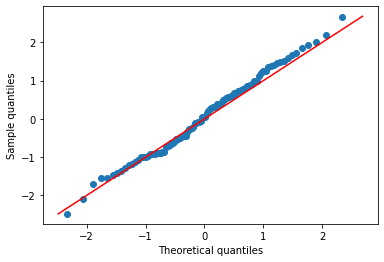

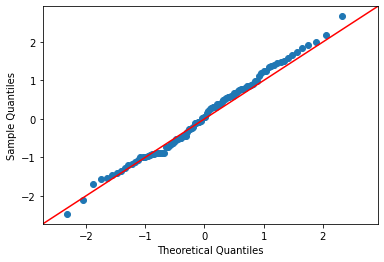

In [483]:
def qqplot(data, distribution):
    """
    Generate a qqplot using the quantiles of the data and the theoretical data of the distribution.
    Superpose on the plot the line y=x.
    
    Parameters
    ----------
    data: np array of shape (100,)
        Empirical data
    
    distribution: distribution from scipy.stats
        Theoretical distribution to compare to
    """
    scores = np.arange(1, len(data) + 1) / (len(data) + 1)
    theoretical_quantile = distribution.ppf(scores)
    plt.figure()
    plt.scatter(theoretical_quantile, np.sort(data))
    plt.plot((np.min(data)-0.01, np.max(data) + 0.01), (np.min(data)-0.01, np.max(data) + 0.01), color="red")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Sample quantiles")
    plt.show()
    
def test_qqplot_sm():
    """
    Test the plot is the same as in sm.qqplot
    """
    X = np.random.normal(0, 1, size=100)
    qqplot(X, scipy.stats.norm)
    sm.qqplot(X, line='45')
    
test_qqplot_sm()

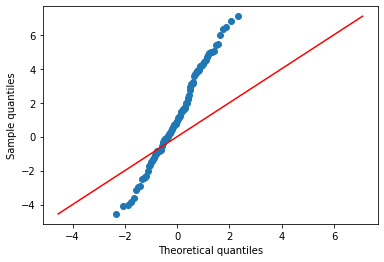

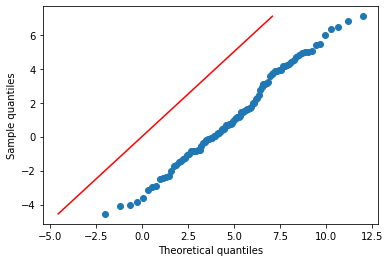

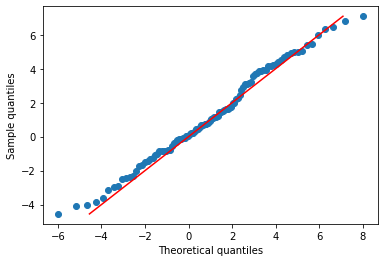

In [484]:
X = np.random.normal(1, 3, size=100)
# make a Q-Q plot against N(0, 1)
qqplot(X, scipy.stats.norm(loc=0, scale=1))
# make a Q-Q plot against N(5, 3)
qqplot(X, scipy.stats.norm(loc=5, scale=3))
# make a Q-Q plot against N(1, 3)
qqplot(X, scipy.stats.norm(loc=1, scale=3))

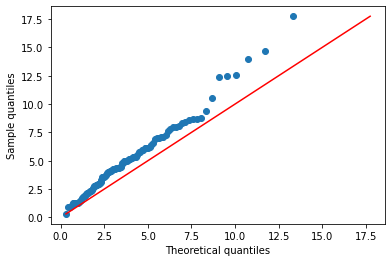

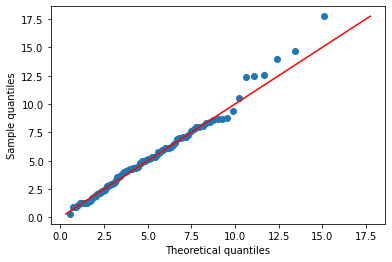

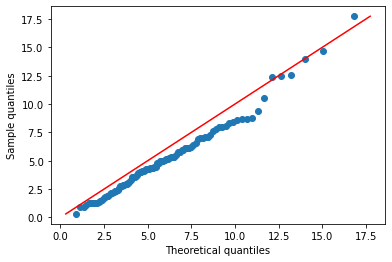

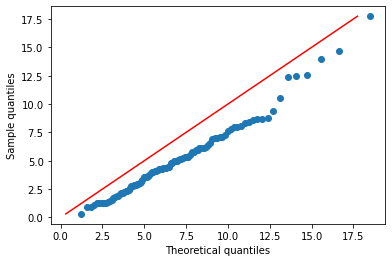

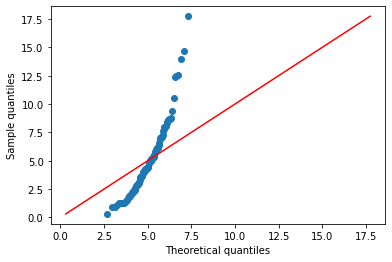

In [485]:
numbers_chi2 = np.random.chisquare(df=5, size=(100, ))

qqplot(numbers_chi2, scipy.stats.chi2(df=4))
qqplot(numbers_chi2, scipy.stats.chi2(df=5))
qqplot(numbers_chi2, scipy.stats.chi2(df=6))
qqplot(numbers_chi2, scipy.stats.chi2(df=7))
qqplot(numbers_chi2, scipy.stats.norm(loc=5, scale=1))

# Generate a simple regression model

Given the sample size n and dimension p, generate a dataset (y, X) where y has size n and X has size n times p,
such that
$y = X \beta^* + \beta_0^* + \epsilon$ where $\epsilon$ has iid $N(0,\sigma^2)$ entries, $X$ has iid $N(0,1)$ entries, and $\beta^*\in R^p$ has norm equal to the signal strength parameter, and $\beta_0^*$ is the intercept.

In [486]:
def linear_regression(X, beta_true, sigma):
    """
    Applies the linear regression model
    
    Parameters
    -----------
    
    X: np array of shape (n, p)
    input features

    beta_true: np array of shape (p)
    true coefficients
    
    sigma: float
    noise standard deviation 

    Return
    ------
    y: np array of shape (n,)
    responses generated accroding to the linear regression model
    y= X beta_star + eps
    """
    n = len(X)
    eps = np.zeros(n)
    if sigma != 0:
        eps = np.random.normal(0, sigma, size=(n))
    return X.dot(beta_true) + eps

def generate_dataset(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set (with intercept = 0)
    Take beta_star uniformly in the sphere of length: signal_strength
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p)
        Features
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
    """
    b_true = np.random.normal(0, 1, size=(p))
    b_true = b_true / np.sqrt(np.sum(b_true**2))
    b_true = b_true * signal_strength
    X = np.random.normal(0, 1, size=(n, p))
    y = linear_regression(X, b_true, sigma)
    return X, y, b_true

def test_nointercept():
    """
    Check that X.dot(b_true) = y when the noise is 0
    """
    X, y, b_true = generate_dataset(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X.dot(b_true), y)
    
test_nointercept()

def generate_dataset_with_intercept(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set, same as before, but here the returned array X should have
    p+1 columns, and the first column contains only 1,1,...,1 to accout for
    possible intercept.
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p + 1)
        Features, last column contains only ones
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
        true coefficients (last one is the intercept)
    """
    b_true = np.random.normal(0, 1, size=(p + 1))
    b_true = b_true / np.linalg.norm(b_true)
    b_true = b_true * signal_strength
    X = np.random.normal(0, 1, size=(n, p))
    X = np.hstack([X, np.ones(n)[:, None]])
    y = linear_regression(X, b_true, sigma)
    return X, y, b_true

def test_intercept():
    """
    Check that X.dot(b_true) = y when the noise is 0 and intercept = 0
    """
    X, y, b_true = generate_dataset_with_intercept(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X[:, :-1].dot(b_true[:-1]) + b_true[-1], y)
    
test_nointercept()
test_intercept()

# Least-squares

Given a design matrix X and response y,
implement the least-squares estimate $\hat\beta = (X^TX)^\dagger X^Ty$
using several methods:

1. using the SVD of X `np.linalg.svd`
2. using the pseudo-inverse of X `np.linalg.pinv`
3. using the inverse of $X^TX$ if full-rank, and its pseudo-inverse otherwise
4. using `scipy.linalg.lstsq`

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the same estimate.

Do the same for $p=20, n=10$. Do all methods provide the same answer?

In [487]:
def compute_least_squares_using_SVD(X, y):
    U, S, V = np.linalg.svd(X, full_matrices=False)
    return V.T.dot(np.diag(1/S)).dot(U.T).dot(y)
    
def compute_least_squares_using_pseudo_inverse(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    
def compute_least_squares_using_method3(X, y):
    if np.linalg.matrix_rank(X.T.dot(X)) >= X.shape[1]:
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    else:
        return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

def compute_least_squares_using_scipy(X, y):
    return scipy.linalg.lstsq(X, y)[0]
    
def test_lsqr():
    for lsqr in [compute_least_squares_using_pseudo_inverse,
                     compute_least_squares_using_method3,
                     compute_least_squares_using_scipy,
                     compute_least_squares_using_SVD
                    ]:
        X, y, _ = generate_dataset_with_intercept(20, 10, sigma=0, signal_strength=1)
        beta = lsqr(X, y)
        np.testing.assert_allclose(X.dot(beta), y)
        
def test_same_estimate_n_larger_than_p():
    for lsqr in [compute_least_squares_using_pseudo_inverse,
                     compute_least_squares_using_method3,
                     compute_least_squares_using_scipy,
                     compute_least_squares_using_SVD
                    ]:
        X, y, _ = generate_dataset_with_intercept(20, 10, signal_strength=1)
        beta = lsqr(X, y)
        beta_0 = compute_least_squares_using_pseudo_inverse(X, y)
        np.testing.assert_allclose(beta, beta_0)
        
def test_same_estimate_n_lower_than_p():
    for lsqr in [compute_least_squares_using_pseudo_inverse,
                     compute_least_squares_using_method3,
                     compute_least_squares_using_scipy,
                     compute_least_squares_using_SVD
                    ]:
        print(lsqr)
        X, y, _ = generate_dataset_with_intercept(10, 20, signal_strength=1)
        beta = lsqr(X, y)
        beta_0 = compute_least_squares_using_pseudo_inverse(X, y)
        np.testing.assert_allclose(beta, beta_0)

        
test_lsqr()
test_same_estimate_n_larger_than_p()
test_same_estimate_n_lower_than_p()

<function compute_least_squares_using_pseudo_inverse at 0x7f3d44bf70d0>
<function compute_least_squares_using_method3 at 0x7f3d44bf7790>
<function compute_least_squares_using_scipy at 0x7f3d44bf7820>
<function compute_least_squares_using_SVD at 0x7f3d44bf7040>


# The distribution of the MLE, the residuals, and the loss

By computing 100 independent datasets with $p=10, n=30$, verify with histograms and
QQ-plots that the squared norm $\|y-X\hat\beta\|^2/\sigma^2$ has chi square distribution, and recall its degrees of freedom.

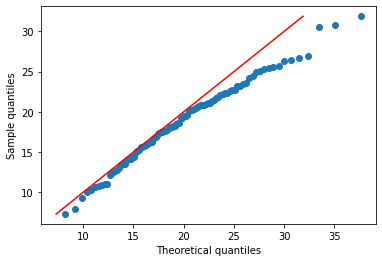

In [488]:
def error_residual_plot():
    sigma = 0.7
    n = 30
    p = 10
    residual = []
    for _ in range(100):
        X, y, _= generate_dataset(n, p, sigma=sigma)
        beta = compute_least_squares_using_SVD(X, y)
        residual.append(np.linalg.norm(y - X.dot(beta)) ** 2 / sigma**2)
    qqplot(np.array(residual), scipy.stats.chi2(df=(n - p)))
    
error_residual_plot()
    


# The curve of the risk of the MLE in high dimension

1. Fix $n=200$, noise level $\sigma^2=0.7$, signal strength $2$, and a grid of values for $p/n$, say $0.1, 0.2, 0.3, 0.4, ..., 2.9, 3.0$. For each for of $n, p$, generate $10$ independent datasets and plot the boxplots corresponding the squared error $\|\hat\beta - \beta^*\|^2$ for each given ratio $p/n$. If $p>n$, make sure that $\hat\beta$ is the solution $(X^TX)^\dagger X^Ty$. Plot the corresponding theoretical curves for the expected squared error found using the formula for expected inverse Wishart matrices.

2. Bonus: Plot also the boxplots for the the bias and variance of the squared error. 

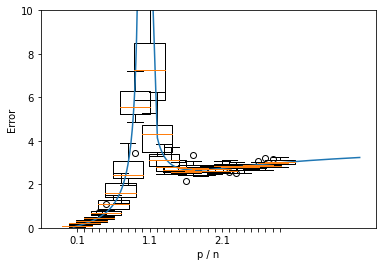

In [493]:
# Question 1
n = 200
sigma = np.sqrt(0.7)
signal_strength =  2
gammas = np.arange(0.1, 3, 0.1)
ps = n * gammas
errors = []
for p in ps:
    p = int(p)
    errors_ = []
    for _ in range(10):
        X, y, b_true = generate_dataset(n, p, sigma, signal_strength)
        b = compute_least_squares_using_SVD(X, y)
        error = np.sum((b - b_true)**2)
        errors_.append(error)
    errors.append(errors_)
errors = np.array(errors).T

def theoretical_error(n, p, sigma):
    return sigma**2 * p / (n- p- 1)

def th_error_general(n, p, sigma, tau):
    if n > p:
        return theoretical_error(n, p, sigma)
    return tau**2 * (1 - n/p) + sigma**2 * n / (p - n- 1)

plt.figure()
plt.boxplot(errors, positions=gammas)
plt.ylim([0, 10])
grid_gamma = np.linspace(0.05, 4, num=400)
grid_gamma = [g for g in grid_gamma if (g < 0.98 or g > 1.2)]
plt.plot(grid_gamma,
         [th_error_general(n, n*g, sigma, signal_strength) for g in grid_gamma],
         label='theory')
plt.xlabel("p / n")
plt.ylabel("Error")
every_nth = 10
for nn, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if nn % every_nth != 0:
        label.set_visible(False)
plt.show()

In [490]:
# Question 2
n = 200
sigma = np.sqrt(0.7)
signal_strength =  2
gammas = np.arange(0.1, 3, 0.1)
ps = n * gammas
biases = []
for p in ps:
    p = int(p)
    biases_ = []
    for _ in range(10):
        X, y, b_true = generate_dataset(n, p, sigma, signal_strength)
        b = compute_least_squares_using_SVD(X, y)
        error = np.sum((b - b_true)**2)
        errors_.append(error)
    errors.append(errors_)
errors = np.array(errors).T

def theoretical_error(n, p, sigma):
    return sigma**2 * p / (n- p- 1)

def th_error_general(n, p, sigma, tau):
    if n > p:
        return theoretical_error(n, p, sigma)
    return tau**2 * (1 - n/p) + sigma**2 * n / (p - n- 1)

plt.figure()
plt.boxplot(errors, positions=gammas)
plt.ylim([0, 10])
grid_gamma = np.linspace(0.05, 4, num=400)
grid_gamma = [g for g in grid_gamma if (g < 0.98 or g > 1.2)]
plt.plot(grid_gamma,
         [th_error_general(n, n*g, sigma, signal_strength) for g in grid_gamma],
         label='theory')
plt.xlabel("p / n")
plt.ylabel("Error")
every_nth = 10
for nn, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if nn % every_nth != 0:
        label.set_visible(False)
plt.show()

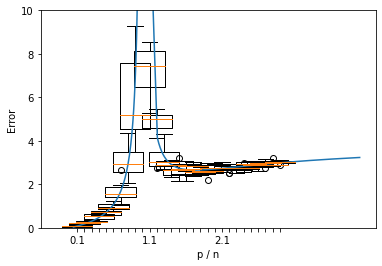

In [492]:
[a for a in [1, 2, 3] if a != 1]

[2, 3]